<a href="https://colab.research.google.com/github/alamfatih/DataAnalytics-Portfolio-Fatih/blob/main/CaseStudy(Games_Sales).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import data

In [ ]:
# read data from google sheet
sheet_url = 'https://docs.google.com/spreadsheets/d/18nCexUyyqZ2g74BalhoLut8qYd2UuTzC7kLKCQ8v1d0/edit#gid=1485085913'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
print(sheet_url_trf)
df = pd.read_csv(sheet_url_trf)

https://docs.google.com/spreadsheets/d/18nCexUyyqZ2g74BalhoLut8qYd2UuTzC7kLKCQ8v1d0/export?format=csv&gid=1485085913


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       139 non-null    object 
 1   Sales      139 non-null    float64
 2   Series     139 non-null    object 
 3   Release    139 non-null    object 
 4   Genre      139 non-null    object 
 5   Developer  139 non-null    object 
 6   Publisher  139 non-null    object 
dtypes: float64(1), object(6)
memory usage: 7.7+ KB


In [ ]:
df.columns

Index(['Name', 'Sales', 'Series', 'Release', 'Genre', 'Developer',
       'Publisher'],
      dtype='object')

# Data Cleaning

In [ ]:
# change data type 'Release' to datetime
df['Release'] = pd.to_datetime(df['Release'])
df = df.drop_duplicates()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 0 to 138
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       139 non-null    object        
 1   Sales      139 non-null    float64       
 2   Series     139 non-null    object        
 3   Release    139 non-null    datetime64[ns]
 4   Genre      139 non-null    object        
 5   Developer  139 non-null    object        
 6   Publisher  139 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 8.7+ KB


,Name,Sales,Series,Release,Genre,Developer,Publisher
0,Minecraft,33.0,Minecraft,2011-11-01,"Sandbox, survival",Mojang Studios,Mojang Studios
1,Diablo III,20.0,Diablo,2012-05-01,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
2,World of Warcraft,14.0,Warcraft,2004-11-01,MMORPG,Blizzard Entertainment,Blizzard Entertainment
3,Half-Life 2,12.0,Half-Life,2004-11-01,First-person shooter,Valve,Valve (digital)
4,The Witcher 3: Wild Hunt,12.0,The Witcher,2015-05-01,Action role-playing,CD Projekt Red,CD Projekt


# Answer business questions

## Which game is the oldest and the newest games in that dataset?

In [ ]:
df[['Name','Release']].sort_values('Release').head()

,Name,Release
107,Hydlide,1984-12-01
24,Where in the World Is Carmen Sandiego?,1985-06-01
72,International Karate,1985-11-01
128,Tetris,1988-01-01
16,Last Ninja 2,1988-08-01


The oldest game is Hydlide

In [ ]:
df[['Name','Release']].sort_values('Release', ascending=False).head()

,Name,Release
90,Crusader Kings III,2020-09-01
96,Divinity: Original Sin II,2017-09-01
76,Nier: Automata,2017-03-01
104,Hearts of Iron IV,2016-06-01
42,7 Days to Die,2016-06-01


The newest game is Crusader Kings III

## Which publisher published most of the games?

In [ ]:
agg_publisher = df.groupby('Publisher', as_index=False)['Name'].nunique()
agg_publisher.sort_values('Name', ascending=False)

,Publisher,Name
20,Electronic Arts,19
7,Blizzard Entertainment,8
2,Activision,6
25,GT Interactive,5
43,Paradox Interactive,4
...,...,...
29,Impressions Game,1
30,Infogrames,1
31,Infogrames / Atari,1
33,Konami,1


The answer is Electronic Arts with 19 published games.

<Axes: xlabel='Publisher', ylabel='Name'>

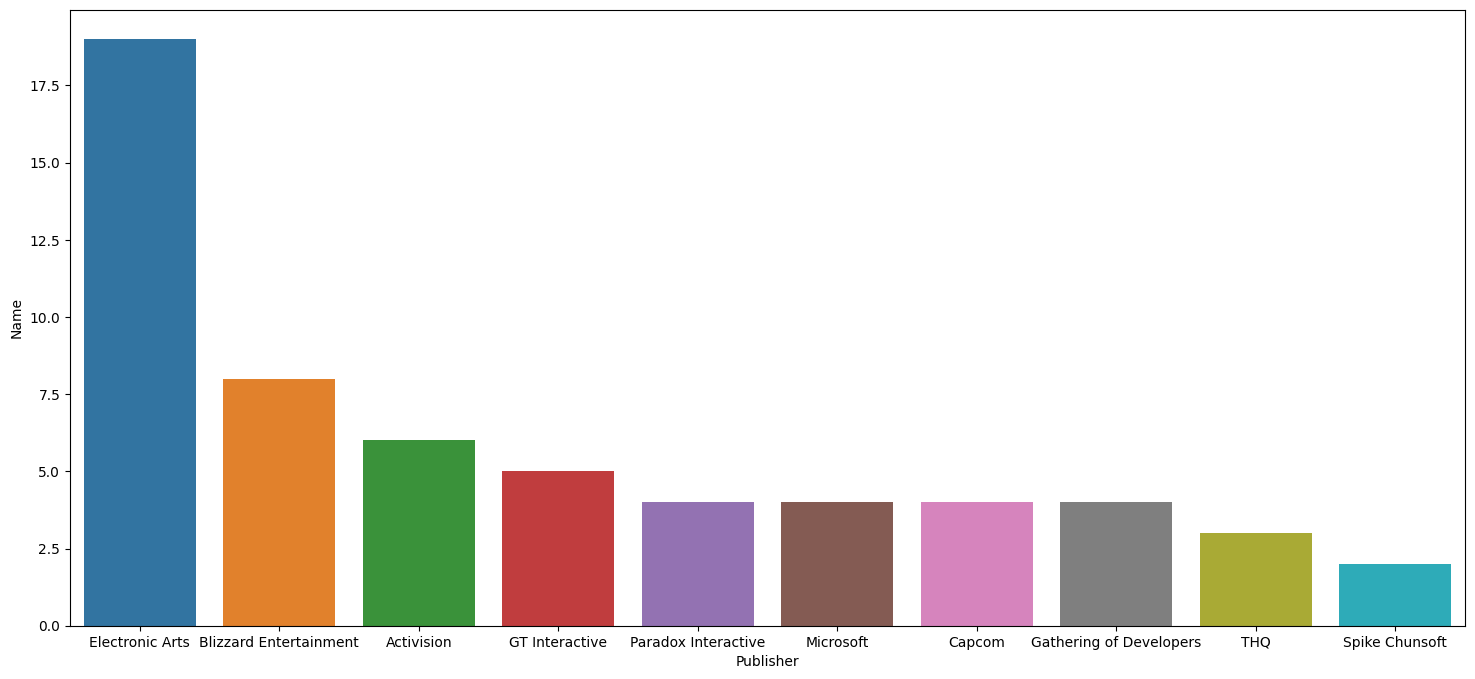

In [ ]:
# data visualization
plt.rcParams["figure.figsize"] = (18,8)
sns.barplot(x='Publisher',y='Name', data = agg_publisher.sort_values('Name', ascending=False).head(10))

## Which developer developed most of the games?

In [ ]:
agg_dev = df.groupby('Developer', as_index=False)['Name'].nunique()
agg_dev.sort_values('Name', ascending=False)

,Developer,Name
4,Blizzard Entertainment,8
41,Maxis,6
80,id Software,4
10,Capcom,4
49,Paradox Development Studio,4
...,...,...
47,Namco Bandai Games,1
48,Origin Systems,1
50,PlatinumGames,1
12,Chris Sawyer,1


The answer is Blizzard Entertainment with 8 developed games

<Axes: xlabel='Developer', ylabel='Name'>

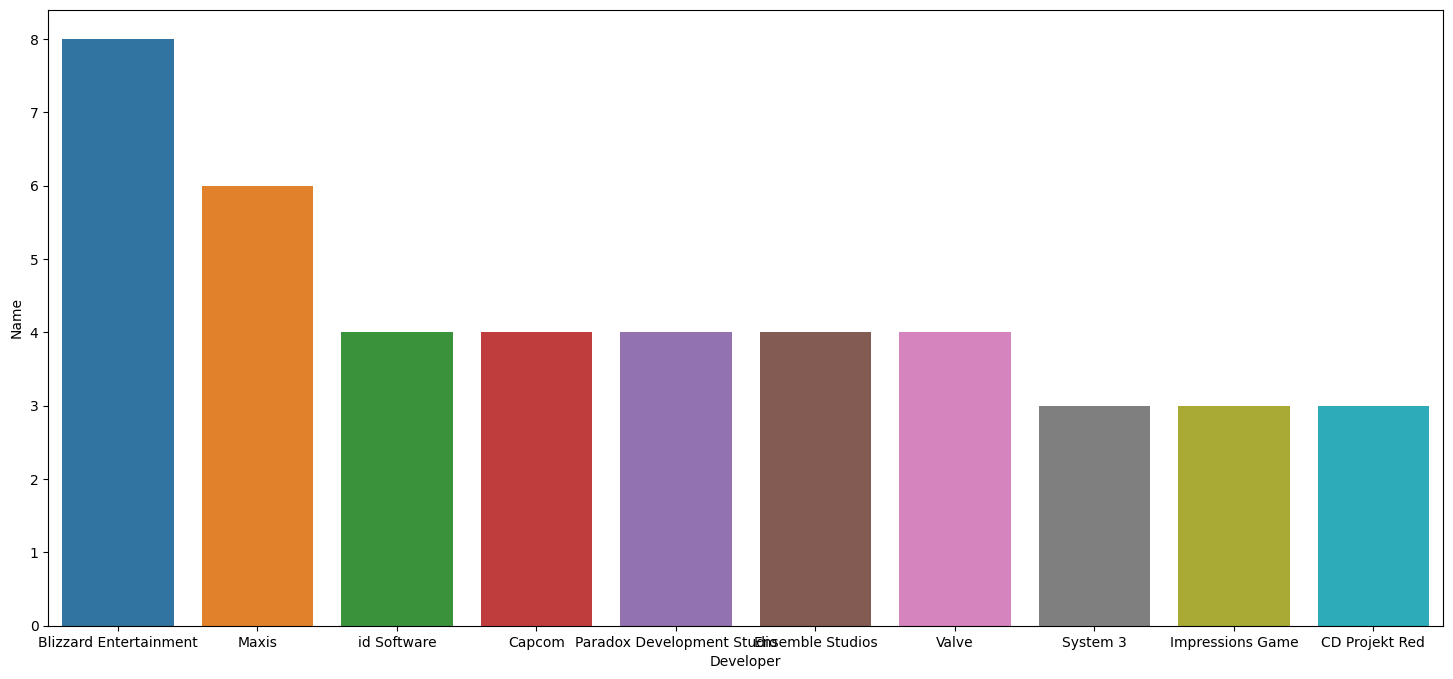

In [ ]:
# data visualization
sns.barplot(x='Developer', y='Name', data = agg_dev.sort_values('Name', ascending=False).head(10))

## Which series has the most sales?

In [ ]:
agg_seriess = df.groupby('Series', as_index=False).agg({'Sales':'sum','Name':'nunique'})
agg_seriess.sort_values('Sales', ascending=False)

,Series,Sales,Name
47,Minecraft,33.0,1
22,Diablo,26.0,3
75,The Sims,24.0,3
36,Half-Life,21.0,2
85,Warcraft,19.0,3
...,...,...,...
60,RoboCop,1.0,1
46,Microsoft Flight Simulator,1.0,1
58,Railroad Tycoon,1.0,1
56,Psychonauts,1.0,1


The answer is Minecraft with 33 sales

<Axes: xlabel='Series', ylabel='Sales'>

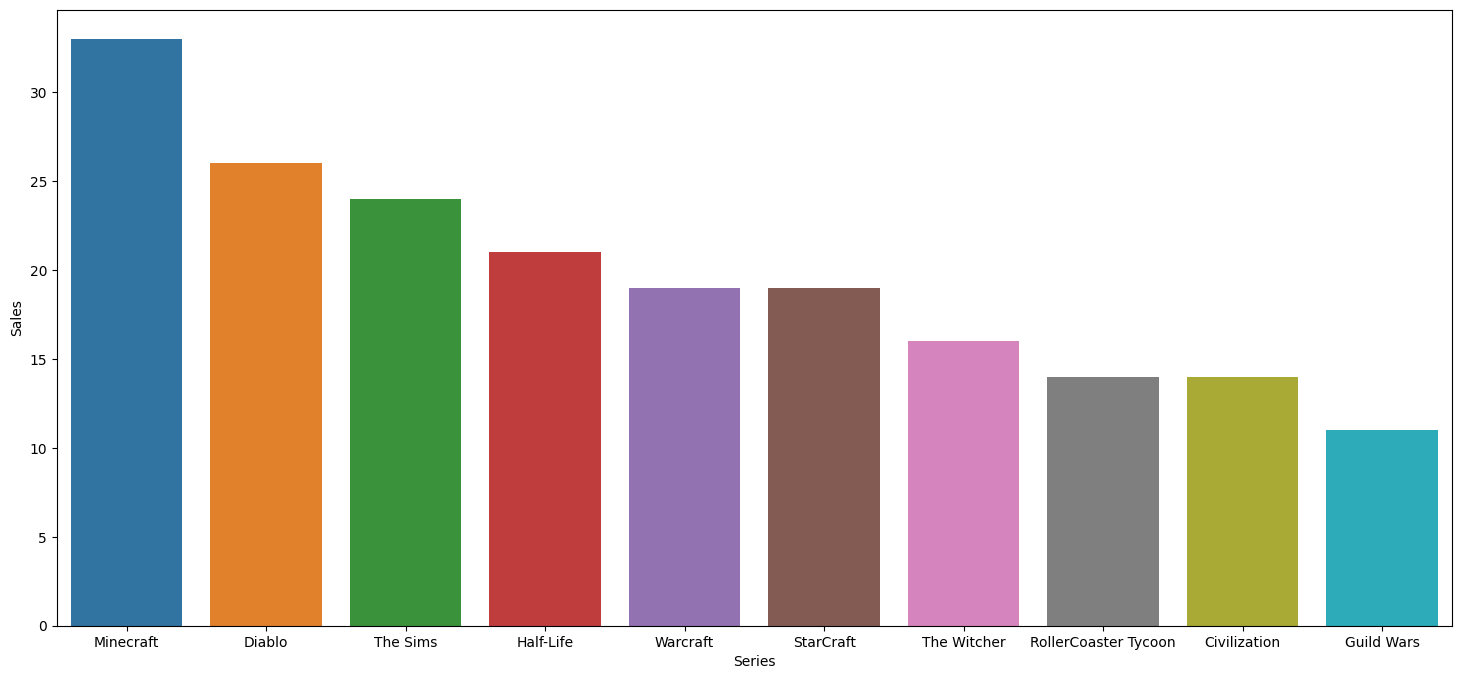

In [ ]:
# data visualization
sns.barplot(x='Series', y='Sales', data = agg_seriess.sort_values('Sales', ascending=False).head(10))

## Which series have the most games?



In [ ]:
agg_series = df.groupby('Series', as_index=False)['Name'].nunique()
agg_series.sort_values('Name', ascending=False)

,Series,Name
13,Command & Conquer,5
68,StarCraft,4
2,Age of Empires,4
12,Civilization,4
20,Dark Souls,3
...,...,...
41,International Karate,1
40,Hydlide,1
38,Hearts of Iron,1
37,Harry Potter,1


The answer is Command & Conquer with 5 games

<Axes: xlabel='Series', ylabel='Name'>

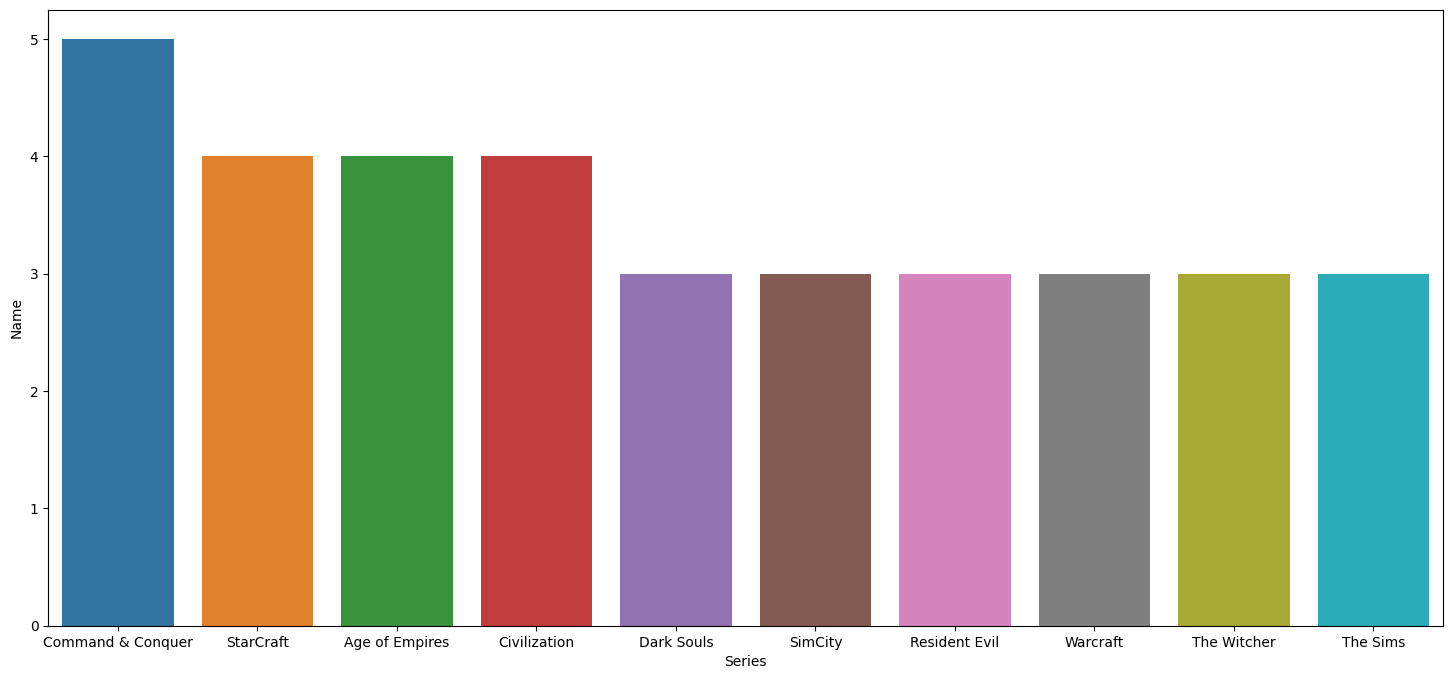

In [ ]:
sns.barplot(x='Series', y='Name', data = agg_series.sort_values('Name', ascending=False).head(10))